<a href="https://colab.research.google.com/github/Manedk/AIEnegineer/blob/main/Delete%20Reto-KaggleCOVID19DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras.utils
import keras
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from mpl_toolkits.mplot3d.axes3d import get_test_data
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D
from keras import models
from keras import layers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=e5c9f3f31e908914e40dfd9ad0e437d1181b49816cc63889f556766b6cb1839f
  Stored in directory: /root/.cache/pip/wheels/2f/e9/19/d3d310a06735013bf467216222ebb92b1158c5d3ae006bf92a
Successfully built keras.utils


In [ ]:
from google.colab import drive
import os
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
from google.colab import drive #Mandar a llamar drive desde google colab:
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
os.chdir("drive/MyDrive/COVID-19_Radiography_Dataset") #And then to cd to any directory in the Google drive:

In [ ]:
base_dir = "drive/MyDrive/COVID-19_Radiography_Dataset"

In [ ]:
#SE CREAN LAS CARPETAS QUE CONTENDRAN LOS DATOS DE PRUEBA, ENTRENAMIENTO Y TEST ----------YA NO EJECUTAR ESTO
!mkdir "train"
!mkdir "validation"
!mkdir "test"


mkdir: cannot create directory ‘train’: File exists
mkdir: cannot create directory ‘validation’: File exists
mkdir: cannot create directory ‘test’: File exists


In [ ]:
#----------YA NO EJECUTAR ESTO
#SE CREA LA CARPETA COVID EN LA CARPETA TRAIN QUE CONTIENE LOS DATOS DE ENTRENAMIENTO PARA COVID <<<<<<
train_dir = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/train", "COVID")
os.mkdir(train_dir)
#SE CREA LA CARPETA COVID EN LA CARPETA VALIDATION QUE CONTIENE LOS DATOS DE ENTRENAMIENTO PARA COVID <<<<<<<
validation_dir = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/validation", "COVID")
os.mkdir(validation_dir)
#SE CREA LA CARPETA COVID EN LA CARPETA TEST QUE CONTIENE LOS DATOS DE ENTRENAMIENTO PARA COVID <<<<<<<
test_dir = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/test", "COVID")
os.mkdir(test_dir)

In [ ]:
#----------YA NO EJECUTAR ESTO
#SE CREA LA CARPETA LUNG OPACITY EN LA CARPETA TRAIN QUE CONTIENE LOS DATOS DE ENTRENAMIENTO PARA LUNG OPACITY <<<<<<
train_dir = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/train", "Lung_Opacity")
os.mkdir(train_dir)
#SE CREA LA CARPETA LUNG OPACITY EN LA CARPETA VALIDATION QUE CONTIENE LOS DATOS DE ENTRENAMIENTO PARA LUNG OPACITY <<<<<<
validation_dir = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/validation", "Lung_Opacity")
os.mkdir(validation_dir)
#SE CREA LA CARPETA LUNG OPACITY EN LA CARPETA TEST QUE CONTIENE LOS DATOS DE ENTRENAMIENTO PARA LUNG OPACITY <<<<<<
test_dir = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/test", "Lung_Opacity")
os.mkdir(test_dir)

In [ ]:
#----------YA NO EJECUTAR ESTO
#SE CREA LA CARPETA NORMAL EN LA CARPETA TRAIN QUE CONTIENE LOS DATOS DE ENTRENAMIENTO PARA LUNG NORMAL <<<<<<<
train_dir = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/train", "Normal")
os.mkdir(train_dir)
#SE CREA LA CARPETA NORMAL EN LA CARPETA VALIDATION QUE CONTIENE LOS DATOS DE ENTRENAMIENTO PARA LUNG NORMAL <<<<<<<<
validation_dir = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/validation", "Normal")
os.mkdir(validation_dir)
#SE CREA LA CARPETA NORMAL EN LA CARPETA TEST QUE CONTIENE LOS DATOS DE ENTRENAMIENTO PARA LUNG NORMAL <<<<<<
test_dir = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/test", "Normal")
os.mkdir(test_dir)

In [ ]:
#----------YA NO EJECUTAR ESTO
#SE CREA LA CARPETA VIRAL PNEUMONIA EN LA CARPETA TRAIN QUE CONTIENE LOS DATOS DE ENTRENAMIENTO PARA VIRAL PNEUMONIA <<<<<<
train_dir = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/train", "Viral Pneumonia")
os.mkdir(train_dir)
#SE CREA LA CARPETA VIRAL PNEUMONIA EN LA CARPETA VALIDATION QUE CONTIENE LOS DATOS DE ENTRENAMIENTO PARA VIRAL PNEUMONIA <<<<<<<
validation_dir = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/validation", "Viral Pneumonia")
os.mkdir(validation_dir)
#SE CREA LA CARPETA VIRAL PNEUMONIA EN LA CARPETA TEST QUE CONTIENE LOS DATOS DE ENTRENAMIENTO PARA VIRAL PNEUMONIA <<<<<<<
test_dir = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/test", "Viral Pneumonia")
os.mkdir(test_dir)

In [ ]:
#----------YA NO EJECUTAR ESTO
count_covid_img = os.listdir("/content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID/images")
print("NUMERO DE IMAGENES DE COVID  >>>>>",len(count_covid_img))
count_covid_img = os.listdir("/content/drive/MyDrive/COVID-19_Radiography_Dataset/Lung_Opacity/images")
print("NUMERO DE IMAGENES DE LUNG OPACITY  >>>>>",len(count_covid_img))
count_covid_img = os.listdir("/content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal/images")
print("NUMERO DE IMAGENES DE NORMAL  >>>>>",len(count_covid_img))
count_covid_img = os.listdir("/content/drive/MyDrive/COVID-19_Radiography_Dataset/Viral Pneumonia/images")
print("NUMERO DE IMAGENES DE VIRAL PNEUMONIA  >>>>>",len(count_covid_img))

In [ ]:
#----------YA NO EJECUTAR ESTO
!ls "/content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID"

In [ ]:
i = 1 #----------YA NO EJECUTAR ESTO

In [ ]:
#----------YA NO EJECUTAR ESTO
#SE COPIAN LAS 1000 IMAGENES DE COVID A LA CARPETA TRAIN
import os, shutil

fnames = ['COVID-{}.png'.format(i) for i in range(1,1000)]
for fname in fnames:
    src = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID/images", fname)
    dst = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/train/COVID", fname)
    shutil.copyfile(src, dst)
count_covid_img = os.listdir("/content/drive/MyDrive/COVID-19_Radiography_Dataset/train/COVID")
print("NUMERO DE IMAGENES DE COVID PARA TRAIN >>>>>",len(count_covid_img))

In [ ]:
#----------YA NO EJECUTAR ESTO
#SE COPIAN LAS 150 IMAGENES DE COVID A LA CARPETA TEST
fnames = ['COVID-{}.png'.format(i) for i in range(1000,1150)]
for fname in fnames:
    src = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID/images", fname)
    dst = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/test/COVID", fname)
    shutil.copyfile(src, dst)
count_covid_img = os.listdir("/content/drive/MyDrive/COVID-19_Radiography_Dataset/test/COVID")
print("NUMERO DE IMAGENES DE COVID PARA TEST >>>>>",len(count_covid_img))

In [ ]:
#----------YA NO EJECUTAR ESTO
#SE COPIAN LAS 150 IMAGENES DE COVID A LA CARPETA VALIDACION
fnames = ['COVID-{}.png'.format(i) for i in range(1150,1300)]
for fname in fnames:
    src = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID/images", fname)
    dst = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/validation/COVID", fname)
    shutil.copyfile(src, dst)
count_covid_img = os.listdir("/content/drive/MyDrive/COVID-19_Radiography_Dataset/validation/COVID")
print("NUMERO DE IMAGENES DE COVID PARA VALIDACION >>>>>",len(count_covid_img))

In [ ]:
#----------YA NO EJECUTAR ESTO
#SE COPIAN LAS 1000 IMAGENES DE LUNG OPACITY A LA CARPETA TRAIN
fnames = ['Lung_Opacity-{}.png'.format(i) for i in range(1,1000)]
for fname in fnames:
    src = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/Lung_Opacity/images", fname)
    dst = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/train/Lung_Opacity", fname)
    shutil.copyfile(src, dst)
count_covid_img = os.listdir("/content/drive/MyDrive/COVID-19_Radiography_Dataset/train/Lung_Opacity")
print("NUMERO DE IMAGENES DE LUNG OPACITY PARA TRAIN >>>>>",len(count_covid_img))

In [ ]:
#----------YA NO EJECUTAR ESTO
#SE COPIAN LAS 150 IMAGENES DE LUNG OPACITY A LA CARPETA TEST
fnames = ['Lung_Opacity-{}.png'.format(i) for i in range(1000,1150)]
for fname in fnames:
    src = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/Lung_Opacity/images", fname)
    dst = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/test/Lung_Opacity", fname)
    shutil.copyfile(src, dst)
count_covid_img = os.listdir("/content/drive/MyDrive/COVID-19_Radiography_Dataset/test/Lung_Opacity")
print("NUMERO DE IMAGENES DE LUNG OPACITY PARA TEST >>>>>",len(count_covid_img))

In [ ]:
#----------YA NO EJECUTAR ESTO
#SE COPIAN LAS 150 IMAGENES DE LUNG OPACITY A LA CARPETA VALIDATION
fnames = ['Lung_Opacity-{}.png'.format(i) for i in range(1150,1300)]
for fname in fnames:
    src = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/Lung_Opacity/images", fname)
    dst = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/validation/Lung_Opacity", fname)
    shutil.copyfile(src, dst)
count_covid_img = os.listdir("/content/drive/MyDrive/COVID-19_Radiography_Dataset/validation/Lung_Opacity")
print("NUMERO DE IMAGENES DE LUNG OPACITY PARA VALIDATION >>>>>",len(count_covid_img))

In [ ]:
#----------YA NO EJECUTAR ESTO
#SE COPIAN LAS 1000 IMAGENES DE NORMAL A LA CARPETA TRAIN
fnames = ['Normal-{}.png'.format(i) for i in range(1,1000)]
for fname in fnames:
    src = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal/images", fname)
    dst = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/train/Normal", fname)
    shutil.copyfile(src, dst)
count_covid_img = os.listdir("/content/drive/MyDrive/COVID-19_Radiography_Dataset/train/Normal")
print("NUMERO DE IMAGENES DE NORMAL PARA TRAIN >>>>>",len(count_covid_img))

In [ ]:
#----------YA NO EJECUTAR ESTO
#SE COPIAN LAS 150 IMAGENES DE NORMAL A LA CARPETA TEST
fnames = ['Normal-{}.png'.format(i) for i in range(1000,1150)]
for fname in fnames:
    src = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal/images", fname)
    dst = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/test/Normal", fname)
    shutil.copyfile(src, dst)
count_covid_img = os.listdir("/content/drive/MyDrive/COVID-19_Radiography_Dataset/test/Normal")
print("NUMERO DE IMAGENES DE NORMAL PARA TEST >>>>>",len(count_covid_img))

In [ ]:
#----------YA NO EJECUTAR ESTO
#SE COPIAN LAS 150 IMAGENES DE NORMAL A LA CARPETA VALIDATION
fnames = ['Normal-{}.png'.format(i) for i in range(1150,1300)]
for fname in fnames:
    src = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal/images", fname)
    dst = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/validation/Normal", fname)
    shutil.copyfile(src, dst)
count_covid_img = os.listdir("/content/drive/MyDrive/COVID-19_Radiography_Dataset/validation/Normal")
print("NUMERO DE IMAGENES DE NORMAL PARA VALIDATION >>>>>",len(count_covid_img))

In [ ]:
#----------YA NO EJECUTAR ESTO
#SE COPIAN LAS 1000 IMAGENES DE VIRAL PNEUMONIA A LA CARPETA TRAIN
fnames = ['Viral Pneumonia-{}.png'.format(i) for i in range(1,1000)]
for fname in fnames:
    src = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/Viral Pneumonia/images", fname)
    dst = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/train/Viral Pneumonia", fname)
    shutil.copyfile(src, dst)
count_covid_img = os.listdir("/content/drive/MyDrive/COVID-19_Radiography_Dataset/train/Viral Pneumonia")
print("NUMERO DE IMAGENES DE VIRAL PNEUMONIA PARA TRAIN >>>>>",len(count_covid_img))

In [ ]:
#----------YA NO EJECUTAR ESTO
#SE COPIAN LAS 150 IMAGENES DE VIRAL PNEUMONIA A LA CARPETA TEST
fnames = ['Viral Pneumonia-{}.png'.format(i) for i in range(1000,1150)]
for fname in fnames:
    src = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/Viral Pneumonia/images", fname)
    dst = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/test/Viral Pneumonia", fname)
    shutil.copyfile(src, dst)
count_covid_img = os.listdir("/content/drive/MyDrive/COVID-19_Radiography_Dataset/test/Viral Pneumonia")
print("NUMERO DE IMAGENES DE NORMAL PARA TEST >>>>>",len(count_covid_img))

In [ ]:
#----------YA NO EJECUTAR ESTO
#SE COPIAN LAS 150 IMAGENES DE VIRAL PNEUMONIA A LA CARPETA VALIDATION
fnames = ['Viral Pneumonia-{}.png'.format(i) for i in range(1150,1300)]
for fname in fnames:
    src = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/Viral Pneumonia/images", fname)
    dst = os.path.join("/content/drive/MyDrive/COVID-19_Radiography_Dataset/validation/Viral Pneumonia", fname)
    shutil.copyfile(src, dst)
count_covid_img = os.listdir("/content/drive/MyDrive/COVID-19_Radiography_Dataset/validation/Viral Pneumonia")
print("NUMERO DE IMAGENES DE VIRAL PNEUMONIA PARA VALIDATION >>>>>",len(count_covid_img))

In [ ]:
# DIRECTORIOOS DEE TRAIN, TEST, VAL PARA GOOOGLE COLAB
base_dir = "/content/drive/MyDrive/COVID-19_Radiography_Dataset" #DIRECTORIO BASE
train_dir = os.path.join(base_dir, 'train') #VARIABLE QUE ALMACENA DIRECTORIO TRAIN: COVID, LUNG_OPACITY,NORMAL,VIRAL PNEUMONIA
validation_dir = os.path.join(base_dir, 'validation') #VARIABLE QUE ALMACENA DIRECTORIO VALIDACION: COVID, LUNG_OPACITY,NORMAL,VIRAL PNEUMONIA
test_dir = os.path.join(base_dir, 'test') #VARIABLE QUE ALMACENA DIRECTORIO TEST: COVID, LUNG_OPACITY,NORMAL,VIRAL PNEUMONIA

#ACCESAR A LOS DIRECTORIOS COVID,LUNG_OPACITY,NORMAL,VIRAL PNEUMONIA DE LA CARPETA TRAIN USANDO LAS VARIABLES ANTERIORES
train_COVID_dir = os.path.join(train_dir, 'COVID')
train_Lung_Opacity_dir = os.path.join(train_dir, 'Lung_Opacity')
train_Normal_dir = os.path.join(train_dir, 'Normal')
train_Viral_Pneumonia_dir = os.path.join(train_dir, 'Viral Pneumonia')

#ACCESAR A LOS DIRECTORIOS COVID,LUNG_OPACITY,NORMAL,VIRAL PNEUMONIA DE LA CARPETA TEST USANDO LAS VARIABLES ANTERIORES
test_COVID_dir = os.path.join(test_dir, 'COVID')
test_Lung_Opacity_dir = os.path.join(test_dir, 'Lung_Opacity')
test_Normal_dir = os.path.join(test_dir, 'Normal')
test_Viral_Pneumonia_dir = os.path.join(test_dir, 'Viral Pneumonia')

#ACCESAR A LOS DIRECTORIOS COVID,LUNG_OPACITY,NORMAL,VIRAL PNEUMONIA DE LA CARPETA VALIDACION USANDO LAS VARIABLES ANTERIORES
validation_COVID_dir = os.path.join(validation_dir, 'COVID')
validation_Lung_Opacity_dir = os.path.join(validation_dir, 'Lung_Opacity')
validation_Normal_dir = os.path.join(validation_dir, 'Normal')
validation_Viral_Pneumonia_dir = os.path.join(validation_dir, 'Viral Pneumonia')

In [ ]:
#MODEL PREENTRENADO----------------------------------|||||||||||||||||||||||||||||||||||||||

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.applications import VGG16

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
conv_base = keras.applications.inception_v3.InceptionV3 (
   include_top = False,
   weights = 'imagenet',
   input_shape=(299, 299, 3))

In [ ]:
#conv_base = VGG16(weights='imagenet',
#                  include_top=False,
#                  input_shape=(299, 299, 3))

In [ ]:
#1.- If you are doing multiclass classification (one answer per input,
#2.- where the answer may be one-of-n possibilities)
#3.- then I blv. the problem may be remedied using
#--------generator = datagen.flow_from_directory(directory,target_size=(224, 224),batch_size=batch_size,class_mode='sparse')--------
#https://stackoverflow.com/questions/62062004/valueerror-could-not-broadcast-input-array-from-shape-20-2-into-shape-20

In [ ]:
#4.- From the docs, "categorical" is for 2D one-hot encoded labels, "binary" will be 1D binary labels,
#5.- "sparse" will be 1D integer labels. Since you don't want multi-label but rather multiclass, use
#6.- sparse. The 1 dimension of sparse is the batch dimension, while the 2 dimensions of one-hot is 1
#7.- dimension for batch and another for a set of labels .
#8.- If you are actually doing multiclass classification (more than one output class per input , like
#9.- labelling both animal type and fruit type in an image) then you would prob. want
#10.- labels = np.zeros(shape=(sample_count),2)
#11.- which allows for 2 labels (in this case) per input.

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 8, 8, 2048))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size = (299, 299),
        batch_size = batch_size,
        class_mode = 'sparse')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
print("Train features: ", train_features.shape)
validation_features, validation_labels  = extract_features(validation_dir, 1000)
print("Validation features: ", validation_features.shape)
test_features, test_labels = extract_features(test_dir, 1000)
print("Test features: ", test_features.shape)

Found 3996 images belonging to 5 classes.
1/1 [==============================] - 4s 4s/step
Train features:  (2000, 8, 8, 2048)
Found 600 images belonging to 5 classes.
1/1 [==============================] - 5s 5s/step
Validation features:  (1000, 8, 8, 2048)
Found 600 images belonging to 5 classes.
1/1 [==============================] - 4s 4s/step
Test features:  (1000, 8, 8, 2048)


In [ ]:
# Flatten
train_features = np.reshape(train_features, (2000, 8 * 8 * 2048))
validation_features = np.reshape(validation_features, (1000, 8 * 8 * 2048))
test_features = np.reshape(test_features, (1000, 8 * 8 * 2048))

In [ ]:
train_features.shape

(2000, 131072)

In [ ]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
import tensorflow

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=8 * 8 * 2048))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer="adam",
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

history = model.fit(train_features, train_labels,
                  epochs=30,
                  batch_size=20,
                  validation_data=(validation_features, validation_labels))

#history = model.fit(train_features, train_labels,
#                   epochs=30,
#                   batch_size=10)

Epoch 1/30
100/100 [==============================] - 25s 211ms/step - loss: 7.0831 - acc: 0.7280 - val_loss: 0.4436 - val_acc: 0.8560
Epoch 2/30
100/100 [==============================] - 20s 199ms/step - loss: 0.5746 - acc: 0.8045 - val_loss: 0.3894 - val_acc: 0.8880
Epoch 3/30
100/100 [==============================] - 20s 198ms/step - loss: 0.4996 - acc: 0.8210 - val_loss: 0.3182 - val_acc: 0.8810
Epoch 4/30
100/100 [==============================] - 20s 197ms/step - loss: 0.5124 - acc: 0.8230 - val_loss: 0.3265 - val_acc: 0.8740
Epoch 5/30
100/100 [==============================] - 21s 208ms/step - loss: 0.4544 - acc: 0.8335 - val_loss: 0.3771 - val_acc: 0.8850
Epoch 6/30
100/100 [==============================] - 20s 195ms/step - loss: 0.4047 - acc: 0.8520 - val_loss: 0.3091 - val_acc: 0.8980
Epoch 7/30
100/100 [==============================] - 20s 195ms/step - loss: 0.3766 - acc: 0.8430 - val_loss: 0.3044 - val_acc: 0.9020
Epoch 8/30
100/100 [==============================] - 2

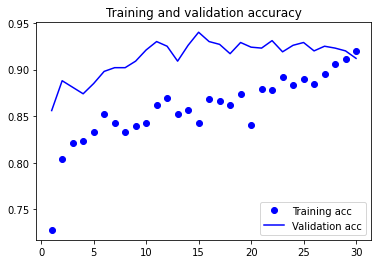

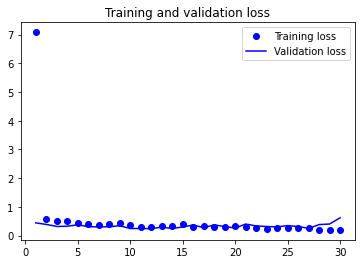

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend();

In [ ]:
# module with image-preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_COVID_dir, fname) for
         fname in os.listdir(train_COVID_dir )]

# chooses one image to augment
img_path = fnames[9]

# reads the image and resizes it
img = image.load_img(img_path, target_size=(400, 400))

x = image.img_to_array(img)


x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

AttributeError: ignored

In [ ]:
#MODEL PREENTRENADO----------------------------------|||||||||||||||||||||||||||||||||||||||

In [ ]:
#TRAIN CONVNET

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(299, 299, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_188 (Conv2D)         (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 148, 148, 32)     0         
 2D)                                                             
                                                                 
 conv2d_189 (Conv2D)         (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_190 (Conv2D)         (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 35, 35, 128)     

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer="adam", # optimizer='rmsprop'
             metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#TAMAÑO DE LA IMAGEN 299 × 299
gen=ImageDataGenerator(validation_split=0.20,rescale=1./255) #,rescale=1./255
b_size = 20


train_batches=gen.flow_from_directory(train_dir,
                                      target_size=(299,299),
                                      class_mode='categorical',
                                      batch_size = b_size,
                                     shuffle=True,
                                     subset="training")
valid_batches=gen.flow_from_directory(validation_dir,
                                      target_size=(299,299),
                                      class_mode='categorical',
                                      batch_size = b_size,
                                     shuffle=False,
                                     subset="validation")
test_batches=gen.flow_from_directory(test_dir,
                                      target_size=(299,299),
                                      class_mode='categorical',
                                      batch_size = b_size,
                                     shuffle=True,
                                     subset="training")

Found 3200 images belonging to 5 classes.
Found 120 images belonging to 5 classes.
Found 480 images belonging to 5 classes.


In [ ]:
print(train_batches)

In [ ]:
for data_batch, labels_batch in train_batches:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 299, 299, 3)
labels batch shape: (20, 5)


In [ ]:
labels_batch

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for data_batch, labels_batch in train_batches:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 299, 299, 3)
labels batch shape: (20, 5)


In [ ]:
labels_batch[4]

array([0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
history = model.fit(
      train_batches,
      steps_per_epoch=15,
      epochs=14,
      validation_data=valid_batches,
      validation_steps=3)

Epoch 1/14
15/15 [==============================] - 19s 1s/step - loss: 0.2886 - acc: 0.9100 - val_loss: 0.2850 - val_acc: 0.8667
Epoch 2/14
15/15 [==============================] - 19s 1s/step - loss: 0.3145 - acc: 0.8867 - val_loss: 0.2787 - val_acc: 0.9333
Epoch 3/14
15/15 [==============================] - 19s 1s/step - loss: 0.2743 - acc: 0.8900 - val_loss: 0.2265 - val_acc: 0.9333
Epoch 4/14
15/15 [==============================] - 19s 1s/step - loss: 0.2626 - acc: 0.8967 - val_loss: 0.2986 - val_acc: 0.8667
Epoch 5/14
15/15 [==============================] - 19s 1s/step - loss: 0.2214 - acc: 0.9233 - val_loss: 0.2192 - val_acc: 0.9167
Epoch 6/14
15/15 [==============================] - 19s 1s/step - loss: 0.2460 - acc: 0.9067 - val_loss: 0.2259 - val_acc: 0.9500
Epoch 7/14
15/15 [==============================] - 19s 1s/step - loss: 0.2323 - acc: 0.9233 - val_loss: 0.2883 - val_acc: 0.8667
Epoch 8/14
15/15 [==============================] - 19s 1s/step - loss: 0.2493 - acc: 0.90

In [ ]:
#model.save('/COV_VIR_NORM_prtc.h5')
model.save(base_dir+'/COV_VIR_NORM_prtc.h5')

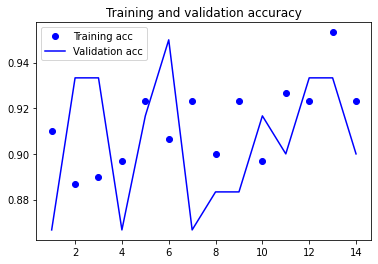

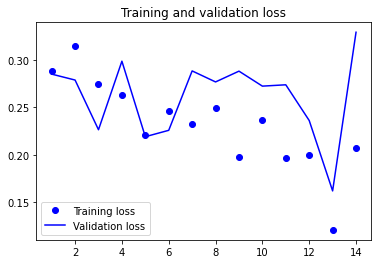

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend();

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from itertools import product

In [ ]:
pred = model.predict(test_batches) #datos de prueba
#test_labels
#test_batches
#labels_batch

In [ ]:
import seaborn as sns

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (This function is copied from the scikit docs.)
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# como mandarla llamar
cm = plot_confusion_matrix(test_batches, pred)
import operator
labels_conf = sorted(test_batches.class_indices.keys(), key=operator.itemgetter(0))
plot_confusion_matrix(cm, labels_conf)

In [ ]:
#DATA AUGMENTATION PARA EVITAR OVERFITING
#---------rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures.
#---------width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
#---------shear_range is for randomly applying shearing transformations.
#---------zoom_range is for randomly zooming inside pictures.
#---------horizontal_flip is for randomly flipping half of the images horizontally -- relevant when there are no assumptions of horizontal asymmetry (e.g. real-world pictures).
#---------fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=80,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

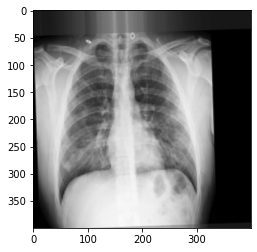

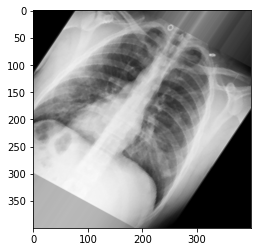

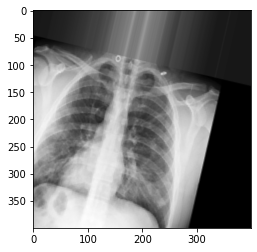

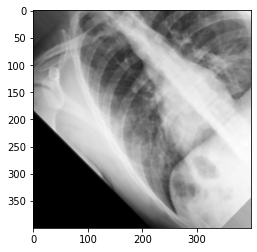

In [ ]:
# module with image-preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_COVID_dir, fname) for
         fname in os.listdir(train_COVID_dir )]

# chooses one image to augment
img_path = fnames[9]

# reads the image and resizes it
img = image.load_img(img_path, target_size=(400, 400))

# converts it to Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# reshapes it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# the .flow() command below generates batches of randomly transformed images
# it will loop indefinitely, so we need to `break` the loop at some point
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

In [ ]:
#train_COVID_dir
#train_Lung_Opacity_dir
#train_Normal_dir
#train_Viral_Pneumonia_dir


If we train a new network using this data augmentation configuration, our network will never see twice the same input. However, the inputs that it sees are still heavily intercorrelated, since they come from a small number of original images. This might not be enough to completely get rid of overfitting. To further fight overfitting, we will also add a Dropout layer to the model:

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 128)     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # target directory
        train_dir,
        # all images will be resized to 200x200
        target_size=(200, 200),
        batch_size=20,
        # since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Found 3996 images belonging to 5 classes.
Found 600 images belonging to 5 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 1.4561 - acc: 0.2700

InvalidArgumentError: ignored